In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Load The Dataset

In [38]:
# Load the dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')

# Display the first few rows of the dataset
data.head(15)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,NaN,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,NaN,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


# Age Distribution Visualization 

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


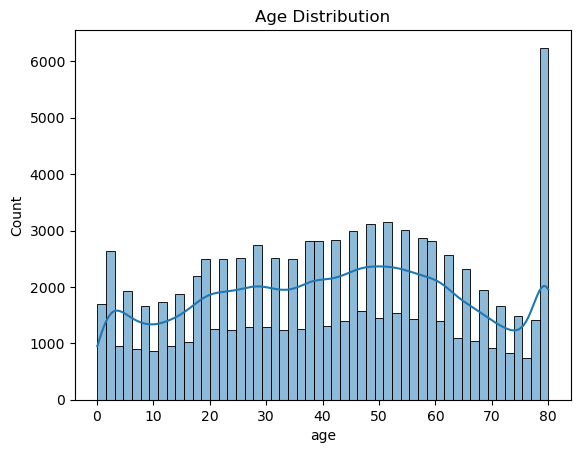

In [44]:


# Age distribution
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()


## Check Unique Values in coloumn gender and smoking_history 

In [19]:

# Check unique values in 'gender' column
unique_genders = data['gender'].unique()
print('Unique values in gender column:', unique_genders)

# Check unique values in 'smoking_history' column
unique_smoking_histories = data['smoking_history'].unique()
print('Unique values in smoking_history column:', unique_smoking_histories)

Unique values in gender column: ['Female' 'Male' 'Other']
Unique values in smoking_history column: ['never' nan 'current' 'former' 'ever' 'not current']


## Check for missing values in all columns

In [21]:
# Check for missing values in all columns
missing_values = data.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        35816
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64


## Data Encoding and Data Cleaning

In [23]:
# Encode the 'gender' column
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})

# Combine similar categories in 'smoking_history' column and handle NaN values
data['smoking_history'] = data['smoking_history'].map({
    'never': 0,
    'current': 1,
    'former': 2,
    'ever': 2,
    'not current': 2
})
data['smoking_history'] = data['smoking_history'].fillna(-1)  # Handle missing values


# Again check the missing values and the uniques values in coloumn gender and smoking history for checking 

In [25]:
# Check for missing values in all columns
missing_values = data.isnull().sum()
print('Missing values in each column:')
print(missing_values)


# Check unique values in 'gender' column
unique_genders = data['gender'].unique()
print('Unique values in gender column:', unique_genders)

# Check unique values in 'smoking_history' column
unique_smoking_histories = data['smoking_history'].unique()
print('Unique values in smoking_history column:', unique_smoking_histories)

Missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Unique values in gender column: [0 1 2]
Unique values in smoking_history column: [ 0. -1.  1.  2.]


## Data Preprocessing

In [27]:
# Separate the features and the target variable
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Building and Training 

In [29]:
# Create and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Create and train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Create and train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)



# Save the trained model and scaler
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

## Model Evaluation

In [80]:
# Evaluate Logistic Regression model
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, lr_pred))
print('Logistic Regression Classification Report:')
print(classification_report(y_test, lr_pred))

# Evaluate Random Forest model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_pred))

# Evaluate SVM model
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, svm_pred))
print('SVM Classification Report:')
print(classification_report(y_test, svm_pred))


Logistic Regression Accuracy: 0.96
Logistic Regression Confusion Matrix:
[[18134   158]
 [  666  1042]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Random Forest Accuracy: 0.97
Random Forest Confusion Matrix:
[[18215    77]
 [  532  1176]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

SVM Accuracy: 0.96
SVM Confusion Matrix:
[[18270    22]
 [  733   975]

## Bar Chart for Model Accuracies 


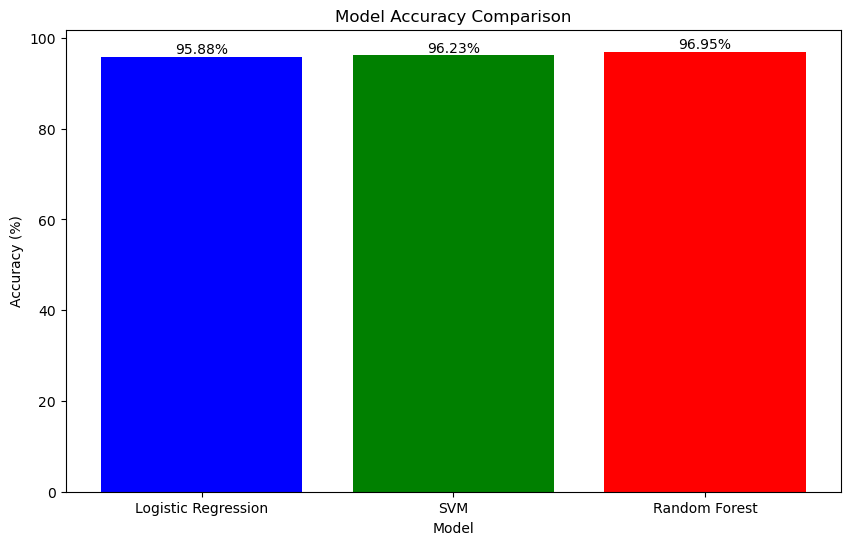

In [82]:

# Convert accuracies to percentages
lr_accuracy *= 100
svm_accuracy *= 100
rf_accuracy *= 100

# Labels for the x-axis
models = ['Logistic Regression', 'SVM', 'Random Forest']

# Accuracy values
accuracies = [lr_accuracy, svm_accuracy, rf_accuracy]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Add titles and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

# Add accuracy values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), f'{accuracy:.2f}%', ha='center', va='bottom')

# Save the plot as PNG file
plt.savefig('accuracy_comparison.png')

# Show the plot
plt.show()

## GUI for User Input and Prediction

In [84]:
def predict_diabetes():
    gender = int(gender_var.get())
    age = int(age_entry.get())
    hypertension = int(hypertension_var.get())
    heart_disease = int(heart_disease_var.get())
    smoking_history = int(smoking_history_var.get())
    bmi = float(bmi_entry.get())
    hba1c_level = float(hba1c_entry.get())
    blood_glucose_level = float(glucose_entry.get())
    
    # Prepare input data for prediction
    input_data = scaler.transform([[gender, age, hypertension, heart_disease, smoking_history, bmi, hba1c_level, blood_glucose_level]])
    
    # Predict using the loaded Random Forest model
    prediction = rf_model.predict(input_data)
    
    # Display the prediction result
    if prediction[0] == 0:
        messagebox.showinfo("Prediction Result", "The model predicts that the person does NOT have diabetes.")
    else:
        messagebox.showinfo("Prediction Result", "The model predicts that the person HAS diabetes.")

# Load the trained model and scaler
rf_model = joblib.load('rf_model.pkl')
scaler = joblib.load('scaler.pkl')

# Create the GUI window
window = tk.Tk()
window.title("Diabetes Prediction")

# Configure the grid to center the widgets
window.grid_columnconfigure(0, weight=1)
window.grid_columnconfigure(1, weight=1)
window.grid_columnconfigure(2, weight=1)

# Create input fields with no prefilled values
tk.Label(window, text="Gender (0: Female, 1: Male, 2: Other):").grid(row=0, column=1, pady=5)
gender_var = tk.StringVar()
tk.Entry(window, textvariable=gender_var).grid(row=0, column=2, pady=5)

tk.Label(window, text="Age:").grid(row=1, column=1, pady=5)
age_entry = tk.Entry(window)
age_entry.grid(row=1, column=2, pady=5)

tk.Label(window, text="Hypertension (0: No, 1: Yes):").grid(row=2, column=1, pady=5)
hypertension_var = tk.StringVar()
tk.Entry(window, textvariable=hypertension_var).grid(row=2, column=2, pady=5)

tk.Label(window, text="Heart Disease (0: No, 1: Yes):").grid(row=3, column=1, pady=5)
heart_disease_var = tk.StringVar()
tk.Entry(window, textvariable=heart_disease_var).grid(row=3, column=2, pady=5)

tk.Label(window, text="Smoking History (0: Never, 1: Current, 2: Former/Ever/Not current):").grid(row=4, column=1, pady=5)
smoking_history_var = tk.StringVar()
tk.Entry(window, textvariable=smoking_history_var).grid(row=4, column=2, pady=5)

tk.Label(window, text="BMI:").grid(row=5, column=1, pady=5)
bmi_entry = tk.Entry(window)
bmi_entry.grid(row=5, column=2, pady=5)

tk.Label(window, text="HbA1c Level:").grid(row=6, column=1, pady=5)
hba1c_entry = tk.Entry(window)
hba1c_entry.grid(row=6, column=2, pady=5)

tk.Label(window, text="Blood Glucose Level:").grid(row=7, column=1, pady=5)
glucose_entry = tk.Entry(window)
glucose_entry.grid(row=7, column=2, pady=5)

# Create Predict button
tk.Button(window, text="Predict", command=predict_diabetes).grid(row=8, column=1, columnspan=2, pady=10)

# Run the GUI loop
window.mainloop()

D:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
